In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_excel('train.xlsx')
training_set = dataset_train.iloc[:, 2:3].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
timestep = 60

for i in range(timestep, 201):
    X_train.append(training_set_scaled[i-timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import GRU
from keras.layers import Dropout

model = Sequential()

model.add(GRU(units=512,
              return_sequences=True,
              input_shape=(X_train.shape[1], 1)))

model.add(Flatten())

model.add(Dense(units = 1, activation='sigmoid'))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
141/141 [==============================] - 2s 16ms/step - loss: 0.0676
Epoch 2/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0600
Epoch 3/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0540
Epoch 4/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0561
Epoch 5/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0494
Epoch 6/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0497
Epoch 7/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0482
Epoch 8/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0470
Epoch 9/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0444
Epoch 10/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0409
Epoch 11/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0399
Epoch 12/300
141/141 [===============

141/141 [==============================] - 1s 9ms/step - loss: 0.0140
Epoch 96/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0121
Epoch 97/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0135
Epoch 98/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0136
Epoch 99/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0109
Epoch 100/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 101/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 102/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0088
Epoch 103/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 104/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0094
Epoch 105/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0095
Epoch 106/300
141/141 [==============================] - 1s 10ms/step - loss: 0.0084
Epoch 1

Epoch 190/300
141/141 [==============================] - 1s 10ms/step - loss: 6.0935e-04
Epoch 191/300
141/141 [==============================] - 1s 9ms/step - loss: 8.1758e-04
Epoch 192/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0018
Epoch 193/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 194/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0015
Epoch 195/300
141/141 [==============================] - 1s 9ms/step - loss: 0.0012
Epoch 196/300
141/141 [==============================] - 2s 12ms/step - loss: 0.0011
Epoch 197/300
141/141 [==============================] - 1s 10ms/step - loss: 5.9426e-04
Epoch 198/300
141/141 [==============================] - 1s 10ms/step - loss: 4.8936e-04
Epoch 199/300
141/141 [==============================] - 1s 10ms/step - loss: 4.4901e-04
Epoch 200/300
141/141 [==============================] - 1s 10ms/step - loss: 4.6808e-04
Epoch 201/300
141/141 [=======================

141/141 [==============================] - 2s 13ms/step - loss: 2.2496e-04
Epoch 283/300
141/141 [==============================] - 2s 16ms/step - loss: 1.8954e-04
Epoch 284/300
141/141 [==============================] - 2s 12ms/step - loss: 1.5383e-04
Epoch 285/300
141/141 [==============================] - 2s 12ms/step - loss: 2.0218e-04
Epoch 286/300
141/141 [==============================] - 1s 9ms/step - loss: 1.5799e-04
Epoch 287/300
141/141 [==============================] - 1s 10ms/step - loss: 2.0874e-04
Epoch 288/300
141/141 [==============================] - 1s 9ms/step - loss: 1.3638e-04
Epoch 289/300
141/141 [==============================] - 1s 9ms/step - loss: 1.8384e-04
Epoch 290/300
141/141 [==============================] - 2s 11ms/step - loss: 2.0018e-04
Epoch 291/300
141/141 [==============================] - 1s 10ms/step - loss: 1.9921e-04
Epoch 292/300
141/141 [==============================] - 1s 10ms/step - loss: 1.4894e-04
Epoch 293/300
141/141 [===============

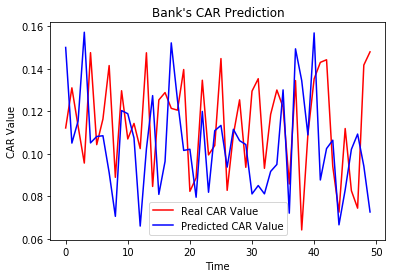

In [14]:
# Part 3 - Making the predictions and visualising the results

# Getting the real CAR values
dataset_test = pd.read_excel('test.xlsx')
real_car = dataset_test.iloc[:, 2:3].values

# Getting the predicted CAR values
dataset_total = pd.concat((dataset_train['Value'], dataset_test['Value']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timestep:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(timestep, timestep+50): # 50 data values in test set
    X_test.append(inputs[i-timestep:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_car = model.predict(X_test)
predicted_car = sc.inverse_transform(predicted_car)

# Visualising the results
plt.plot(real_car, color = 'red', label = 'Real CAR Value')
plt.plot(predicted_car, color = 'blue', label = 'Predicted CAR Value')
plt.title("Bank's CAR Prediction")
plt.xlabel('Time')
plt.ylabel('CAR Value')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(real_car, predicted_car))
rms

0.03234369783820333